## ACF & PACF before ARIMA
2022.09.30

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
import statsmodels.api as sm

In [8]:
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols

In [13]:
import warnings
warnings.filterwarnings('ignore')

### 01. read data

In [9]:
# non stationary
df1 = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)
df1.index.freq = 'MS'

In [11]:
df1.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [10]:
# stationary
df2 = pd.read_csv('DailyTotalFemaleBirths.csv', index_col='Date', parse_dates=True)
df2.index.freq = 'D'

In [12]:
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


### 02. ACF & PACF

In [14]:
df = pd.DataFrame(dict(a=[13,5,11,12,9]))

In [15]:
df

,a
0,13
1,5
2,11
3,12
4,9


In [16]:
# 자기상관 함수
# return 값 : 자기상관계수 배열
acf(df['a'])

array([ 1.   , -0.5  , -0.2  ,  0.275, -0.075])

In [18]:
# 부분 자기상관 함수
# yw : 율-워커 방정식
# mle : 편향 자기상관 계수를 사용하기 위해 입력한, 최대우도추정법
# method default : unbiased
pacf_yw(df['a'], nlags=4, method='mle')

array([ 1.        , -0.5       , -0.6       , -0.38541667, -0.40563273])

In [19]:
pacf_yw(df['a'], nlags=4, method='unbiased')

array([ 1.        , -0.625     , -1.18803419,  2.03764205,  0.8949589 ])

In [20]:
# 율-워커 방정식 대신에 최소 제곱법 방정식으로 계산
# > 상관함수 자체가 서로 다른 여러 방정식으로 계산될 수 있기에, yw와 ols 등으로 다양
# nlags 값은 (행의 수 - 1)
pacf_ols(df['a'], nlags=4)

array([ 1.        , -0.49677419, -0.43181818,  0.53082621,  0.25434783])

### 03. plotting

In [21]:
from pandas.plotting import lag_plot

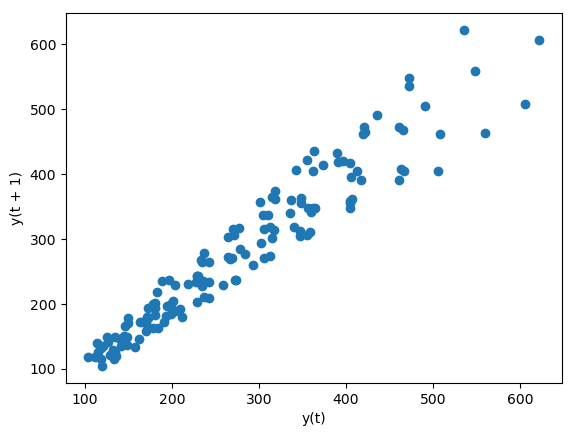

In [22]:
lag_plot(df1['Thousands of Passengers'])

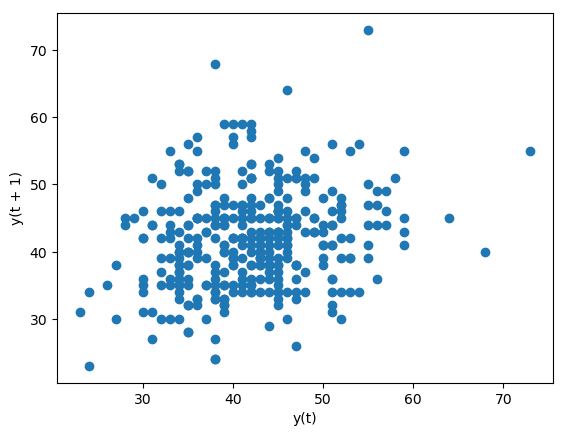

In [23]:
lag_plot(df2['Births'])

### 04. ACF & PACF plotting

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

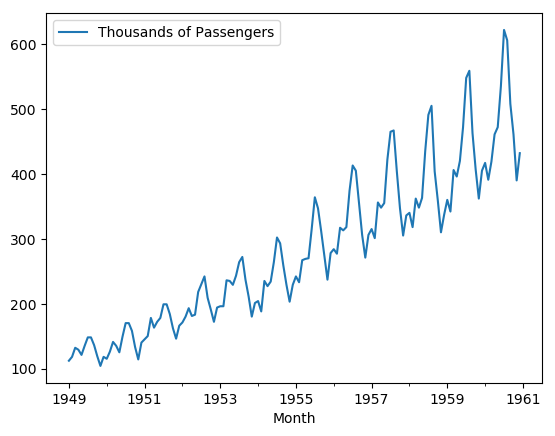

In [25]:
df1.plot()

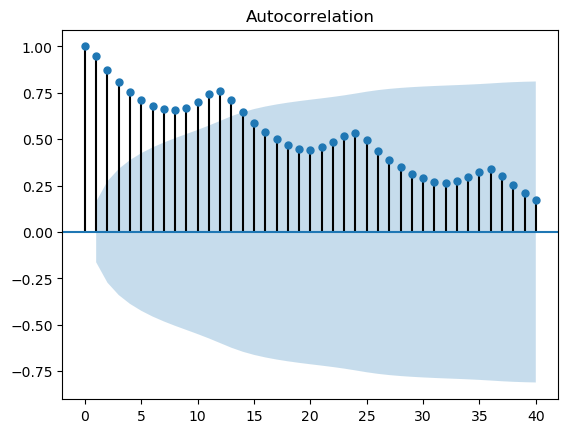

In [27]:
# 44개의 시차 중에서 40개의 시차만 보려고 함
# 뚜렷한 계절성을 확인할 수 있음
# 극대값 = 자기상관 관계가 증가하기 시작하는 특정 지점(12, 24, 36)

# 음영 = (기본적으로) 95% 신뢰구간
# 신뢰구간을 벗어난 상관계수는 상관관계일 가능성이 높음
# > 시차가 적을 수록(=왼쪽) 상관관계가 더욱 뚜렷하게 나타남

plot_acf(df1, lags=40);

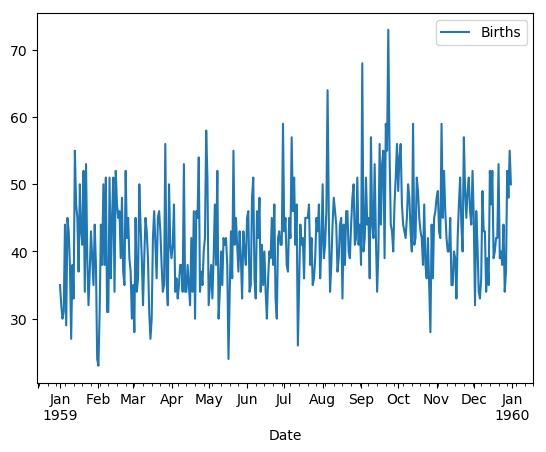

In [28]:
df2.plot()

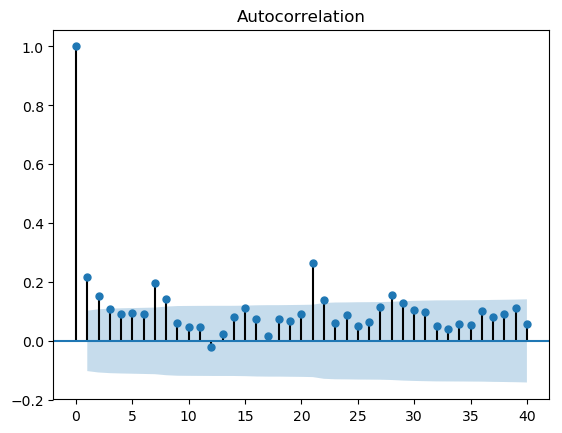

In [30]:
# 정상적 데이터의 전형적인 자기상관 플롯
# 1. 매우 급격한 감소(>모델에 오차항을 추가해야함을 나타냄)
# 2. 계절성을 나타내는 요소를 찾아볼 수 없음
plot_acf(df2, lags=40);

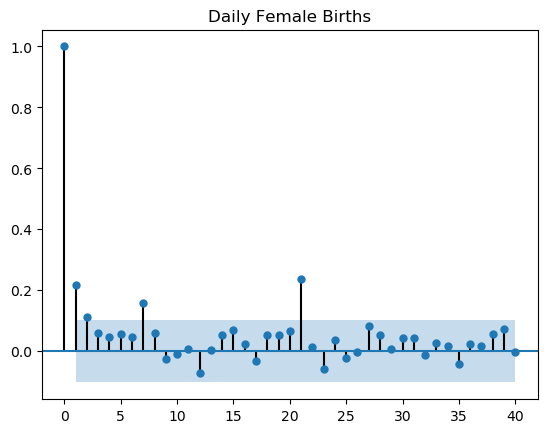

In [33]:
# 일반적으로 부분 자기상관 플롯은, 이미 정상적인 데이터에서 가장 잘 작동
plot_pacf(df2, lags=40, title='Daily Female Births');